In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
data = yf.download("ETH-USD", start="2021-03-11", end="2022-03-11")

[*********************100%***********************]  1 of 1 completed


In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-11,1798.033936,1843.818848,1734.617065,1826.194946,1826.194946,24013132909
2021-03-12,1826.546753,1839.497314,1728.980957,1772.102417,1772.102417,22435821312
2021-03-13,1772.166382,1937.645508,1733.639893,1924.685425,1924.685425,25014689475
2021-03-14,1923.863770,1930.779785,1845.119995,1854.564331,1854.564331,19344589211
2021-03-15,1854.086670,1889.196655,1749.606323,1791.702271,1791.702271,26244738810


In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-07,2555.297607,2639.943115,2455.593750,2497.771240,2497.771240,14594098731
2022-03-08,2497.721436,2618.166016,2489.755127,2576.747559,2576.747559,13922922903
2022-03-09,2577.165283,2761.796387,2573.655273,2729.783447,2729.783447,14173665398
2022-03-10,2729.116455,2729.116455,2566.193115,2608.048584,2608.048584,13292477213
2022-03-11,2608.271240,2664.558594,2534.688232,2559.562988,2559.562988,12382419582


In [10]:
data['Adj Close'].head()

Date
2021-03-11    1826.194946
2021-03-12    1772.102417
2021-03-13    1924.685425
2021-03-14    1854.564331
2021-03-15    1791.702271
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

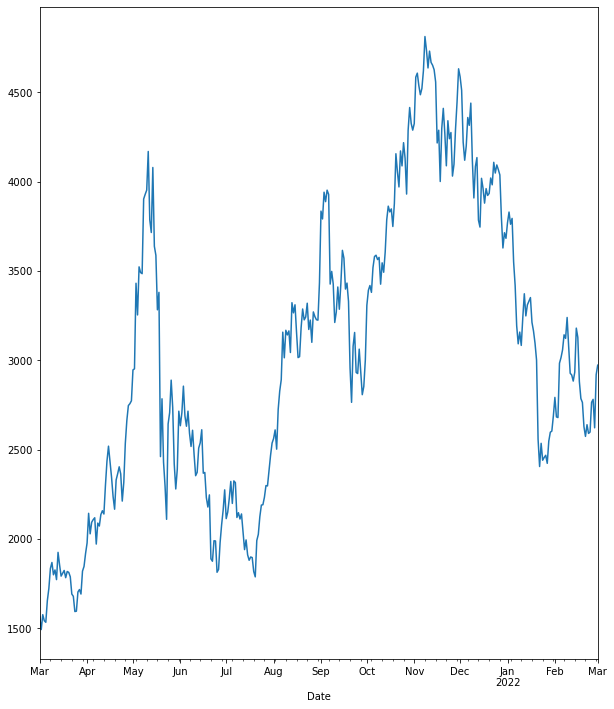

In [8]:
data['Adj Close'].plot(figsize=(10, 12), subplots=True)

In [11]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.02962034771084777,
 0.0861028157003934,
 -0.036432495849089586,
 -0.033895864109025245,
 0.008522359714190818]

In [12]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.030067889946876186,
 0.08259589078773466,
 -0.0371127321901929,
 -0.03448364945036978,
 0.008486249424844293]

In [13]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.33760200 and its annulized volatility is 0.99055846


In [14]:
import os

In [15]:
S0 = 2565.48              # spot stock price
K = 3052.50               # strike  \ State the date u pick the excise price
T = 1.0                 # maturity 
r = 0.0114                 # US Treasure 1-yaear rate  
sig = 0.99               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"   

In [16]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u  

In [17]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [18]:
S

array([[ 2565.48      ,  4543.61232563,  8046.99820914, 14251.69568553],
       [    0.        ,  1448.55836253,  2565.48      ,  4543.61232563],
       [    0.        ,     0.        ,   817.9059395 ,  1448.55836253],
       [    0.        ,     0.        ,     0.        ,   461.81786193]])

In [21]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.3640288735354639

In [22]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , 1603.94163747],
       [   0.        ,    0.        ,    0.        , 2590.68213807]])

In [23]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[1359.2706996 ,  643.81741673,    0.        ,    0.        ],
       [   0.        , 1776.93228298, 1016.19169531,    0.        ],
       [   0.        ,    0.        , 2223.01657166, 1603.94163747],
       [   0.        ,    0.        ,    0.        , 2590.68213807]])

In [24]:
print('European ' + payoff, str( V[0,0]))

European put 1359.2706995963654


In [25]:
print('American ' + payoff, str( V[0,0]))

American put 1359.2706995963654


In [26]:
def mcs_simulation_np(p):
    M = p          # M = time step
    I = p          # I = simulation
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [27]:
T = 1/52
r = 0.0114
sigma = 0.99
S0 = 2565.48
K = 3052.50

In [28]:
S = mcs_simulation_np(10000)

In [33]:
S = np.transpose(S)
S

array([[ 2565.48      ,  2581.2966262 ,  2587.27819346, ...,
          924.66515678,   903.80060653,   896.53339422],
       [ 2565.48      ,  2586.36655224,  2519.09961055, ...,
         1796.49854135,  1802.64103559,  1802.42873215],
       [ 2565.48      ,  2499.96421493,  2552.44795097, ...,
         2805.6310551 ,  2825.95451359,  2866.58402182],
       ...,
       [ 2565.48      ,  2592.65933317,  2598.25308939, ...,
          921.82292037,   927.31829763,   942.38622535],
       [ 2565.48      ,  2550.47637504,  2601.72714473, ...,
          951.39857379,   957.79048217,   952.65313854],
       [ 2565.48      ,  2564.10544253,  2505.80030101, ...,
        18313.97968315, 18088.06280723, 17843.25920247]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

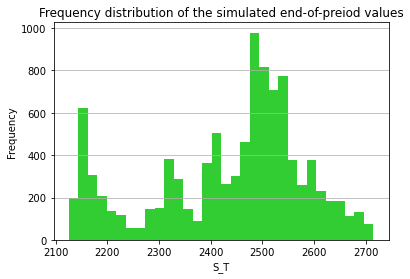

In [29]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#32cd32',alpha=1, rwidth=2.5)

plt.grid(axis='y', alpha=0.95)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [30]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 617.1750787520576


In [31]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.0
